Saving 1234.csv to 1234.csv


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 85773.8594 - mae: 283.6122 - val_loss: 78283.6953 - val_mae: 279.7922
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step - loss: 85770.7656 - mae: 283.6081 - val_loss: 78268.0391 - val_mae: 279.7643
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 85725.3281 - mae: 283.5312 - val_loss: 78251.1484 - val_mae: 279.7341
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 85781.7734 - mae: 283.6277 - val_loss: 78234.9141 - val_mae: 279.7050
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - loss: 85675.9688 - mae: 283.4628 - val_loss: 78219.4141 - val_mae: 279.6773
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step - loss: 85645.8594 - mae: 283.3923 - val_loss: 78203.5391 - val_mae: 279.6490
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 85550.2344 - mae: 283.2336 - val_loss: 78187.4062 - val_mae: 279.6201
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 85607.7812 - mae: 283.3208 - val_loss: 78171.1953

<ipython-input-2-7a756715683c>:104: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Signal'].fillna(method='ffill', inplace=True)
<ipython-input-2-7a756715683c>:104: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Signal'].fillna(method='ffill', inplace=True)


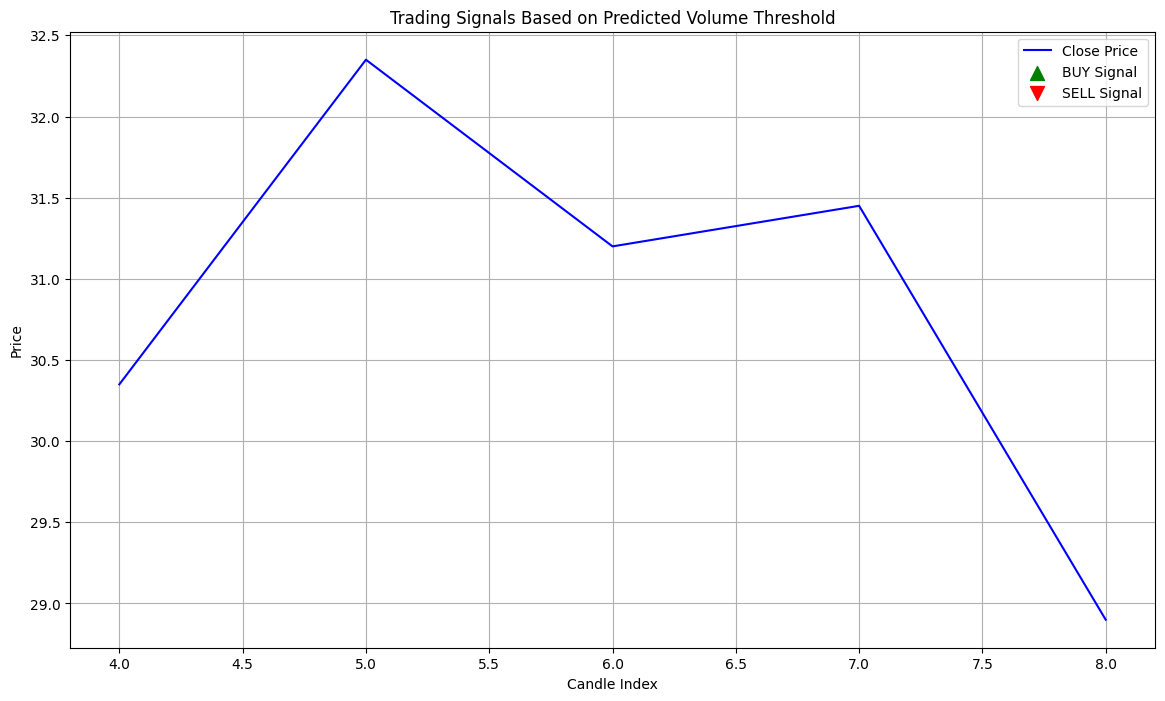

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt


from google.colab import files

# Upload the file
uploaded = files.upload()

data = pd.read_csv('1234.csv')
# Data Preparation
data.columns = data.columns.str.strip()  # Strip any leading/trailing spaces from column names
data = data[['High', 'Low', 'Open', 'Close', 'Volume']]  # Select only relevant columns

# Calculate Price Change and Approximate Volume
data['Price_Change'] = data['Close'] - data['Open']
data['Volume_Approx'] = abs(data['High'] - data['Low']) * 100  # Multiply by a constant factor for approximation

# Create additional features for the model
data['Price_Change_Percentage'] = (data['Close'] - data['Open']) / data['Open'] * 100
data['High_Low_Spread'] = (data['High'] - data['Low']) / data['Low'] * 100
data['ATR'] = abs(data['High'] - data['Low'])  # Average True Range as a feature
data['Relative_Volume'] = data['Volume_Approx'].rolling(window=5).mean() / data['Volume_Approx']  # Relative volume

# Shift the next day's volume and price change as labels
data['Next_Candle_Volume'] = data['Volume_Approx'].shift(-1)
data['Next_Candle_High_Low_Spread'] = data['High_Low_Spread'].shift(-1)

# Drop rows with missing values after shifting
data.dropna(inplace=True)

# Necessary imports for model training
data = data.dropna(subset=['Price_Change_Percentage', 'High_Low_Spread', 'ATR', 'Relative_Volume', 'Next_Candle_Volume'])

# Define features and labels
features = ['Price_Change_Percentage', 'High_Low_Spread', 'ATR', 'Relative_Volume']
labels = 'Next_Candle_Volume'

# Split the data into features and labels
X = data[features]
y = data[labels]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the standardized data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define and compile the neural network model
model = Sequential()
model.add(Dense(64, input_dim=len(features), activation='relu'))
model.add(Dropout(0.2))  # Add dropout layer to reduce overfitting
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16, verbose=1)

# Apply the trained model to the entire dataset to get the predicted volume threshold
data['Predicted_Volume_Threshold'] = model.predict(X_scaled)

# Implement the strategy to generate signals based on the predicted volume threshold
def generate_signals(df, price_threshold=3):
    """
    Generate BUY and SELL signals based on the strategy conditions.

    Args:
        df (pd.DataFrame): The dataframe containing stock price and volume data.
        price_threshold (int): The price change threshold in rupees for generating signals.

    Returns:
        df (pd.DataFrame): DataFrame with 'Signal' column indicating BUY or SELL.
    """
    # Initialize the Signal column
    df['Signal'] = np.nan

    for i in range(len(df) - 1):
        # Check if current volume is greater than the predicted volume threshold
        if (df['Volume_Approx'].iloc[i] > df['Predicted_Volume_Threshold'].iloc[i] and
            df['Close'].iloc[i] < df['Close'].iloc[i - 1]):  # Downtrend observed
            next_open = df['Open'].iloc[i + 1]
            next_high = df['High'].iloc[i + 1]
            next_low = df['Low'].iloc[i + 1]

            # Generate signals based on next candle's open, high, and low prices
            if next_high >= next_open + price_threshold:  # Condition for BUY signal
                df.at[i + 1, 'Signal'] = 'BUY'

            if next_low <= next_open - price_threshold:  # Condition for SELL signal
                df.at[i + 1, 'Signal'] = 'SELL'

    # Forward fill the signals to ensure continuity
    df['Signal'].fillna(method='ffill', inplace=True)

    # To ensure only relevant signals are maintained
    df['Signal'] = np.where((df['Signal'] == 'BUY') | (df['Signal'] == 'SELL'), df['Signal'], np.nan)

    return df

# Apply the signal generation function to the dataset
data_with_signals = generate_signals(data)

# Display the final signals and relevant columns
print(data_with_signals[['Open', 'High', 'Low', 'Close', 'Volume_Approx', 'Predicted_Volume_Threshold', 'Signal']].head(10))

# Plotting the graph using Matplotlib
plt.figure(figsize=(14, 8))

# Plot the Close price using the DataFrame index
plt.plot(data_with_signals.index, data_with_signals['Close'], label='Close Price', color='blue')

# Scatter plot for Buy signals
buy_signals = data_with_signals[data_with_signals['Signal'] == 'BUY']
plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='green', s=100, label='BUY Signal')

# Scatter plot for Sell signals
sell_signals = data_with_signals[data_with_signals['Signal'] == 'SELL']
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', s=100, label='SELL Signal')

# Add titles and labels
plt.title('Trading Signals Based on Predicted Volume Threshold')
plt.xlabel('Candle Index')  # Changed label to represent index
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
